In [6]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

Use DBSCAN to detect anomalies in other produts from the customers dataset.

In [41]:
# Import .csv file and convert it to a DataFrame object.
df = pd.read_csv('customers.csv')

In [42]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
df =df[['Grocery', 'Frozen', 'Delicassen']]

In [44]:
np_array = df.values.astype('float32', copy = False)
np_array[0:10]

array([[ 7561.,   214.,  1338.],
       [ 9568.,  1762.,  1776.],
       [ 7684.,  2405.,  7844.],
       [ 4221.,  6404.,  1788.],
       [ 7198.,  3915.,  5185.],
       [ 5126.,   666.,  1451.],
       [ 6975.,   480.,   545.],
       [ 9426.,  1669.,  2566.],
       [ 6192.,   425.,   750.],
       [18881.,  1159.,  2098.]], dtype=float32)

Normalize each attribute by scaling it to a 0 mean and unit variance. This helps keep the inter-relationships between features intact so that a small change in one feature would reflect in the other.

In [45]:
scaler = MinMaxScaler().fit(np_array)
# np_array.describe()

In [46]:
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.08146416, 0.0031063 , 0.02784731],
       [0.10309667, 0.02854842, 0.03698373],
       [0.08278991, 0.03911643, 0.16355862],
       [0.04546386, 0.1048419 , 0.03723405],
       [0.07755155, 0.063934  , 0.10809346],
       [0.05521843, 0.01053514, 0.03020442],
       [0.07514793, 0.00747814, 0.0113058 ],
       [0.10156612, 0.02701992, 0.05346267],
       [0.06670834, 0.00657419, 0.01558198],
       [0.20347716, 0.01863783, 0.04370046]], dtype=float32)

Contruct a DBSCAN object that requires a minimum of 15 data points in a neighborhood of radius 0.5 to be considered a core point.

In [47]:
dbsc = DBSCAN(eps = .2, min_samples =20).fit(np_array)

In [48]:
# Not lets add the scaled value columns back in to the dataframe
columns = list(df.columns)
columns

['Grocery', 'Frozen', 'Delicassen']

In [49]:
scaled_columns = ["Scaled_" + column for column in columns]
scaled_columns

['Scaled_Grocery', 'Scaled_Frozen', 'Scaled_Delicassen']

In [50]:
# Save a copy of the original dataframe
original_df = df.copy()

In [51]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns = scaled_columns)
scaled_df.head()

,Scaled_Grocery,Scaled_Frozen,Scaled_Delicassen
0,0.081464,0.003106,0.027847
1,0.103097,0.028548,0.036984
2,0.082790,0.039116,0.163559
3,0.045464,0.104842,0.037234
4,0.077552,0.063934,0.108093


In [52]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on = df.index)
df.head()

,key_0,Grocery,Frozen,Delicassen,Scaled_Grocery,Scaled_Frozen,Scaled_Delicassen
0,0,7561,214,1338,0.081464,0.003106,0.027847
1,1,9568,1762,1776,0.103097,0.028548,0.036984
2,2,7684,2405,7844,0.082790,0.039116,0.163559
3,3,4221,6404,1788,0.045464,0.104842,0.037234
4,4,7198,3915,5185,0.077552,0.063934,0.108093


In [53]:
df = df.drop(columns = ['key_0'])

Next we can extract our cluster labels and outliers to plot our results.

In [54]:
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
df['labels'] = labels
df.head()

,Grocery,Frozen,Delicassen,Scaled_Grocery,Scaled_Frozen,Scaled_Delicassen,labels
0,7561,214,1338,0.081464,0.003106,0.027847,0
1,9568,1762,1776,0.103097,0.028548,0.036984,0
2,7684,2405,7844,0.082790,0.039116,0.163559,0
3,4221,6404,1788,0.045464,0.104842,0.037234,0
4,7198,3915,5185,0.077552,0.063934,0.108093,0


In [56]:
df.labels.value_counts()

 0    433
-1      7
Name: labels, dtype: int64

In [57]:
df[df.labels == -1]

,Grocery,Frozen,Delicassen,Scaled_Grocery,Scaled_Frozen,Scaled_Delicassen,labels
23,22019,5154,16523,0.237300,0.084298,0.344597,-1
61,59598,3254,2017,0.642347,0.053070,0.042011,-1
85,92780,1026,2944,1.000000,0.016452,0.061348,-1
93,2062,35009,2698,0.022193,0.574979,0.056216,-1
183,20170,36534,47943,0.217371,0.600043,1.000000,-1
325,13626,60869,5609,0.146836,1.000000,0.116938,-1
333,67298,131,1215,0.725341,0.001742,0.025282,-1


In [58]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("----------")
print("Inliers")
print(df[df.labels == 0].describe())
print("----------")
print("Outliers")
print(df[df.labels == -1].describe())

Population
            Grocery        Frozen    Delicassen  Scaled_Grocery  \
count    440.000000    440.000000    440.000000      440.000000   
mean    7951.277273   3071.931818   1524.870455        0.085671   
std     9503.162829   4854.673333   2820.105937        0.102430   
min        3.000000     25.000000      3.000000        0.000000   
25%     2153.000000    742.250000    408.250000        0.023174   
50%     4755.500000   1526.000000    965.500000        0.051225   
75%    10655.750000   3554.250000   1820.250000        0.114821   
max    92780.000000  60869.000000  47943.000000        1.000000   

       Scaled_Frozen  Scaled_Delicassen      labels  
count     440.000000         440.000000  440.000000  
mean        0.050078           0.031745   -0.015909  
std         0.079789           0.058826    0.125266  
min         0.000000           0.000000   -1.000000  
25%         0.011788           0.008453    0.000000  
50%         0.024670           0.020077    0.000000  
75%    

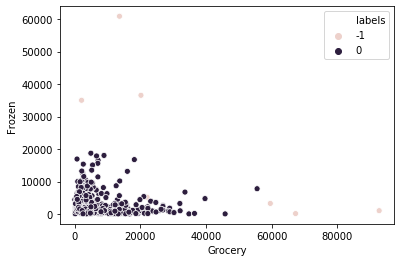

In [59]:
sns.scatterplot(df.Grocery,df.Frozen, hue=df.labels)

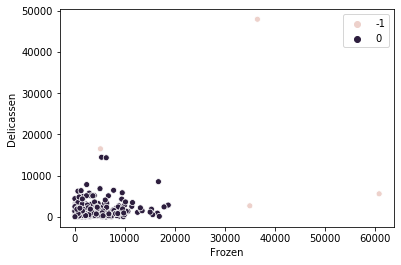

In [60]:
sns.scatterplot(df.Frozen, df.Delicassen, hue=labels)

In [62]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Grocery')

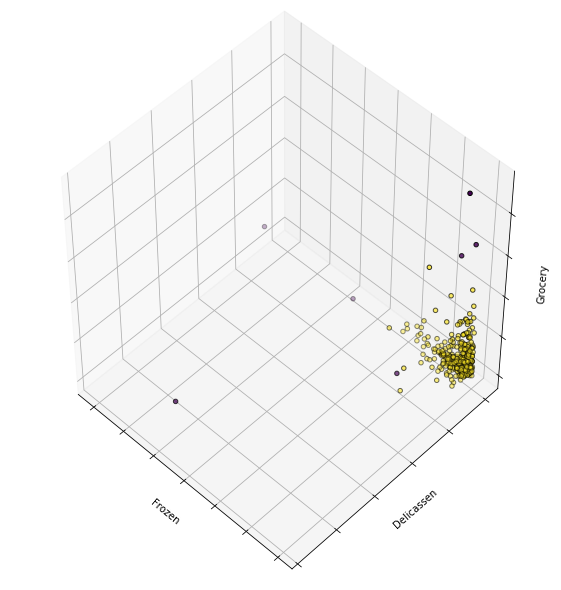

In [64]:
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect = [0,0,.95,1],elev = 48, azim = 134)

# plot the points
ax.scatter(df.Frozen, df. Delicassen, df.Grocery, c = df.labels, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Delicassen')
ax.set_zlabel('Grocery')